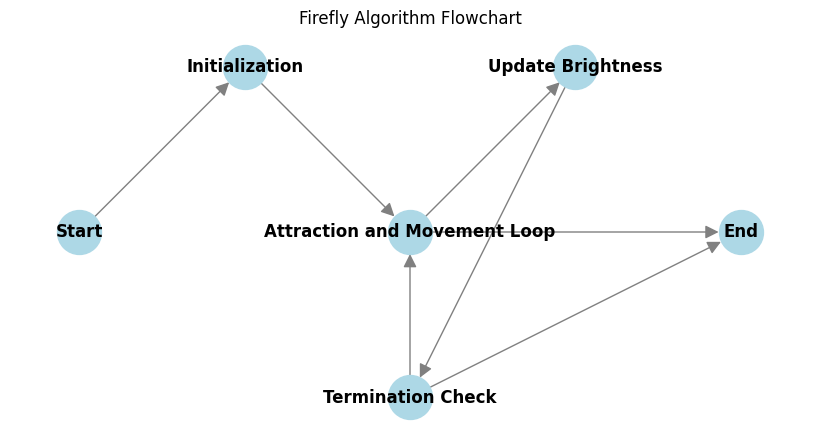

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def create_flowchart():
    # Create a directed graph
    graph = nx.DiGraph()

    # Add nodes to the flowchart
    nodes = [
        'Start',
        'Initialization',
        'Attraction and Movement Loop',
        'Update Brightness',
        'Termination Check',
        'End'
    ]
    graph.add_nodes_from(nodes)

    # Add edges to the flowchart
    edges = [
        ('Start', 'Initialization'),
        ('Initialization', 'Attraction and Movement Loop'),
        ('Attraction and Movement Loop', 'Update Brightness'),
        ('Update Brightness', 'Termination Check'),
        ('Termination Check', 'Attraction and Movement Loop'),
        ('Termination Check', 'End'),
        ('Attraction and Movement Loop', 'End')
    ]
    graph.add_edges_from(edges)

    # Set node positions for better visualization
    pos = {
        'Start': (0, 0),
        'Initialization': (1, 1),
        'Attraction and Movement Loop': (2, 0),
        'Update Brightness': (3, 1),
        'Termination Check': (2, -1),
        'End': (4, 0)
    }

    # Draw the flowchart
    plt.figure(figsize=(8, 4))
    nx.draw(graph, pos, with_labels=True, node_size=1000, node_color='lightblue',
            edge_color='gray', arrowsize=20, font_size=12, font_weight='bold')

    # Add title and show the flowchart
    plt.title('Firefly Algorithm Flowchart')
    plt.show()

# Call the function to create and display the flowchart
create_flowchart()


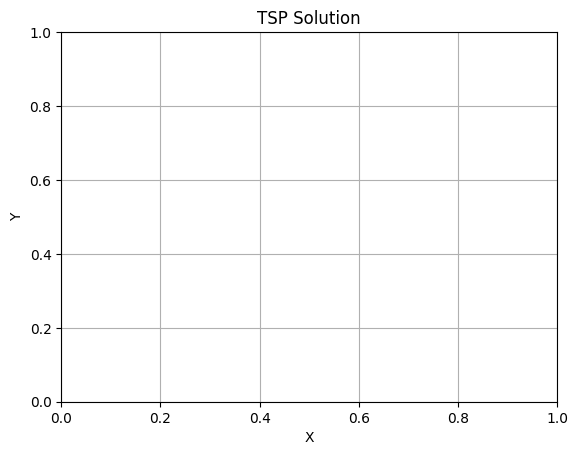

Best Path: [1 1 0 9 6 6 6 3 0 5]
Best Fitness: 1.5119221886449061


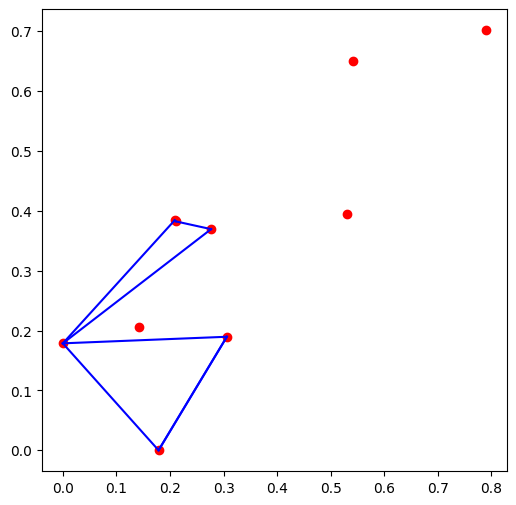

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def initialize_fireflies(num_fireflies, num_cities):
    fireflies = np.zeros((num_fireflies, num_cities), dtype=int)
    for i in range(num_fireflies):
        fireflies[i] = np.random.permutation(num_cities)
    return fireflies

def evaluate_fitness(fireflies, distances):
    fitness = np.zeros(len(fireflies))
    for i in range(len(fireflies)):
        path = fireflies[i]
        fitness[i] = np.sum(distances[path[:-1], path[1:]]) + distances[path[-1], path[0]]
    return fitness

def calculate_attraction(fireflies, fitness):
    attractiveness = np.zeros(len(fireflies))
    for i in range(len(fireflies)):
        for j in range(len(fireflies)):
            if fitness[j] < fitness[i]:
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                attractiveness[i] += (1 / (1 + distance))
    return attractiveness

def move_fireflies(fireflies, attractiveness, beta, alpha):
    new_fireflies = fireflies.copy()
    for i in range(len(fireflies)):
        for j in range(len(fireflies)):
            if attractiveness[j] > attractiveness[i]:
                distance = np.linalg.norm(fireflies[i] - fireflies[j])
                beta_ij = beta * np.exp(-alpha * distance**2)
                move = (beta_ij * (fireflies[j] - fireflies[i])) + np.random.uniform(-1, 1, size=len(fireflies[i]))
                new_position = fireflies[i] + move
                new_fireflies[i] = np.round(new_position) % len(fireflies[i])
    return new_fireflies

def run_firefly_algorithm(num_fireflies, num_iterations, distances):
    num_cities = distances.shape[0]

    # Initialize fireflies
    fireflies = initialize_fireflies(num_fireflies, num_cities)

    best_fitness = np.inf
    best_path = None

    # Main loop
    for iteration in range(num_iterations):
        # Evaluate fitness
        fitness = evaluate_fitness(fireflies, distances)

        # Check if current iteration has improved the best solution
        min_fitness_idx = np.argmin(fitness)
        if fitness[min_fitness_idx] < best_fitness:
            best_fitness = fitness[min_fitness_idx]
            best_path = fireflies[min_fitness_idx].copy()

        # Calculate attractiveness
        attractiveness = calculate_attraction(fireflies, fitness)

        # Update firefly positions
        fireflies = move_fireflies(fireflies, attractiveness, beta=1, alpha=1)

    return best_path, best_fitness

def generate_distance_matrix(num_cities):
    np.random.seed(0)
    cities = np.random.rand(num_cities, 2)
    distances = np.linalg.norm(cities[:, np.newaxis, :] - cities, axis=-1)
    return distances

def plot_tsp_solution(cities, path):
    plt.figure(figsize=(6, 6))
    plt.plot(cities[:, 0], cities[:, 1], 'ro', markersize=6)
    for i in range(len(path) - 1):
        plt.plot([cities[path[i], 0], cities[path[i + 1], 0]],
                 [cities[path[i], 1], cities[path[i + 1], 1]], 'b-')
    plt.plot([cities[path[-1], 0], cities[path[0], 0]],
         [cities[path[-1], 1], cities[path[0], 1]], 'b-')
    plt.plot([cities[path[-1], 0], cities[path[0], 0]],
         [cities[path[-1], 1], cities[path[0], 1]], 'b-')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('TSP Solution')
plt.grid(True)
plt.show()

# Generate random distance matrix for 10 cities
num_cities = 10
distances = generate_distance_matrix(num_cities)

# Run the firefly algorithm for 100 iterations with 20 fireflies
num_iterations = 100
num_fireflies = 20
best_path, best_fitness = run_firefly_algorithm(num_fireflies, num_iterations, distances)

# Print the best path and its fitness
print("Best Path:", best_path)
print("Best Fitness:", best_fitness)

# Plot the TSP solution
cities = generate_distance_matrix(num_cities)
plot_tsp_solution(cities, best_path)





